In [36]:
import numpy as np
import pandas as pd 
import tensorflow as tf

from tqdm import tqdm

In [173]:
# MNIST 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(_, _), (x_D,y) = mnist.load_data() # 데이터가 비교적 적은 Test Data만 불러옴

x_D = x_D.reshape(10000, -1) # Flatten 후, 각 Instance의 shape는 (784,) -> 784차원

temp = np.concatenate([x_D, y.reshape(-1,1)], axis = 1) # 이후 시각화 단계에서 Label 별 Color 표시를 위해 임시로 X와 y를 Concat함
np.random.shuffle(temp)

n_samples = 1000 # 사용할 Instance 갯수

x_D, y = temp[:n_samples,:-1], temp[:n_samples,-1] # 데이터 일부 샘플링

print(x_D.shape, y.shape)


(1000, 784) (1000,)


# MDS Procedure
1. Proximity/Distance Matrix 생성
2. Distance 정보를 보존하는 저차원 상에서의 좌표 추출

## Step1. Proximity/Distance Matrix 생성

In [196]:
D_matrix = np.zeros((len(x_D), len(x_D)))
print(D_matrix.shape)

for i in tqdm(range(len(x_D))):
    for j in range(len(x_D)):
        D_matrix[i,j] = (np.linalg.norm(x_D[i,:] - x_D[j,:])) 

print(D_matrix)

(1000, 1000)


100%|██████████| 1000/1000 [00:07<00:00, 126.95it/s]

[[   0.         2674.51079639 2294.30054701 ... 2817.29799631
  2580.19921711 2405.40162967]
 [2461.57998042    0.         2356.82095205 ... 2744.01020406
  2490.93275702 2213.93428087]
 [1963.75329408 2289.26822369    0.         ... 2553.99823806
  2198.79535201 1894.83350192]
 ...
 [2068.92822495 2272.25174662 2019.17879347 ...    0.
  2153.49529835 2110.77023856]
 [2155.5259219  2410.71151323 1855.96901914 ... 2571.14565904
     0.         2114.42025151]
 [2085.61669537 2312.01405705 1955.4707873  ... 2519.56643096
  2156.97311063    0.        ]]


## Step2. 저차원 좌표 추출

### Step 2-1. 내적 행렬 B 계산

In [197]:
n = len(D_matrix)
H = np.eye(n)-(1/n)*(np.ones((n,n)))
B = -H.dot(D_matrix).dot(H)/2

print(H.shape, B.shape)

(1000, 1000) (1000, 1000)


### Step 2-2. 행렬 B의 Eigen Value 및 Eigen Vector 구하기

In [198]:
eigen_value, eigen_vector = np.linalg.eig(B)
inverseEigenVectors = np.linalg.inv(eigen_vector) 
diagonal = inverseEigenVectors.dot(B).dot(eigen_vector)

### Step 2-3. Target Dimension(저차원)으로 축소

In [199]:
target_dim = 2
B_1 = eigen_vector[:,0:target_dim].dot(diagonal[0:target_dim,0:target_dim]).dot(eigen_vector[:,0:target_dim].T)
diagonal[diagonal<1] = 0
coordinate_X = eigen_vector[:,0:target_dim].dot(np.sqrt(diagonal[0:target_dim,0:target_dim]))
print(coordinate_X.shape)

(1000, 2)


## Target Dim(=2)로 차원 축소 후 시각화

In [200]:
df = pd.DataFrame({'dim 1':coordinate_X[:,0], 'dim 2':coordinate_X[:,1], 'label':y})
df.sample(10)

,dim 1,dim 2,label
329,-2.890469-0.000000j,-5.167629-0.000000j,4
862,3.863566+0.000000j,6.597356+0.000000j,3
95,1.793333+0.000000j,-4.759478-0.000000j,9
716,-6.772247-0.000000j,7.170560+0.000000j,1
448,-2.572508-0.000000j,2.942640+0.000000j,2
44,-7.021475-0.000000j,1.639211+0.000000j,1
128,-1.388045-0.000000j,1.868291+0.000000j,2
926,19.288941+0.000000j,2.888398+0.000000j,0
451,-5.551701-0.000000j,-4.029931-0.000000j,7
296,-2.993116-0.000000j,-0.053034-0.000000j,8


c:\Users\SeongHee\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


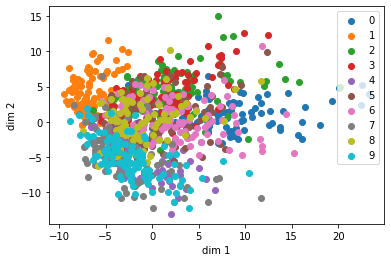

In [201]:
import matplotlib.pyplot as plt

class_labels = np.unique(y).tolist()

for class_label in class_labels:
    plt.scatter(df[df['label'] == class_label].iloc[:,0], df[df['label'] == class_label].iloc[:,1], label = class_label)

plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.legend()